<a href="https://colab.research.google.com/github/JCSR2022/challenge3-data-science-Alura/blob/main/challenge3_data_science_Alura_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Telecom X - Churn Analysis Part 2

### 🎯 Mission

Develop predictive models capable of forecasting which customers are most likely to cancel their services.

The company wants to proactively address the issue of churn, and it is your responsibility to build a robust pipeline for this initial modeling stage.

---

### 🧠 Challenge Objectives

* **Data Preparation:** Prepare the data for modeling (cleaning, encoding, and normalization).
* **Feature Engineering:** Perform correlation analysis and variable selection.
* **Model Training:** Train two or more classification models.
* **Performance Evaluation:** Evaluate model performance using relevant metrics.
* **Interpretation:** Interpret the results, including feature importance.
* **Strategic Conclusion:** Create a strategic conclusion identifying the primary factors influencing customer churn.

---

## 0. Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1.Data Preparation



### 1.1 Load and Review feature types

- Numerical variables

- Binary encoded variables

- One-hot encoded categorical variables

In [3]:
#https://github.com/JCSR2022/challenge3-data-science-Alura/blob/main/data/df_ML.csv
git_raw = 'https://raw.githubusercontent.com/'
url_github = 'JCSR2022/challenge3-data-science-Alura/main/data/df_ML.csv'
datos = pd.read_csv(git_raw + url_github)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   churn                                          6808 non-null   int64  
 1   customer_seniorcitizen                         6808 non-null   int64  
 2   customer_partner                               6808 non-null   int64  
 3   customer_dependents                            6808 non-null   int64  
 4   customer_tenure                                6808 non-null   float64
 5   internet_onlinesecurity                        6808 non-null   int64  
 6   internet_onlinebackup                          6808 non-null   int64  
 7   internet_deviceprotection                      6808 non-null   int64  
 8   internet_techsupport                           6808 non-null   int64  
 9   account_paperlessbilling                       6808 

In [4]:
datos.sample(5)

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,account_paperlessbilling,account_charges_monthly,account_charges_daily,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_One year,account_contract_Two year,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
799,0,1,1,0,1.406495,0,0,0,0,1,-1.484680,-0.701833,False,True,False,True,False,False,False
2789,0,0,0,0,-1.279868,0,0,0,0,0,-1.466403,-0.135367,False,True,False,False,False,False,True
3462,1,0,0,0,-1.198463,0,0,0,0,0,-0.376447,2.117080,False,False,False,False,True,False,False
2638,0,1,1,0,1.325090,1,0,0,0,1,1.197011,1.594779,True,False,True,False,False,True,False
523,0,0,1,1,1.610007,1,1,1,1,0,0.032287,-0.388130,False,False,False,True,False,False,False


In [5]:
datos.describe()

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,account_paperlessbilling,account_charges_monthly,account_charges_daily
count,6808.000000,6808.000000,6808.000000,6808.000000,6.808000e+03,6808.000000,6808.000000,6808.000000,6808.000000,6808.000000,6.808000e+03,6.808000e+03
mean,0.267039,0.162456,0.483108,0.297004,-9.601929e-17,0.285253,0.343566,0.343566,0.289512,0.592538,4.800964e-17,-3.131064e-18
std,0.442445,0.368896,0.499751,0.456972,1.000073e+00,0.451568,0.474933,0.474933,0.453569,0.491398,1.000073e+00,1.000073e+00
min,0.000000,0.000000,0.000000,0.000000,-1.279868e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.544495e+00,-9.983425e-01
25%,0.000000,0.000000,0.000000,0.000000,-9.542480e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-9.729323e-01,-8.302621e-01
50%,0.000000,0.000000,0.000000,0.000000,-1.401987e-01,0.000000,0.000000,0.000000,0.000000,1.000000,1.868079e-01,-3.909332e-01
75%,1.000000,0.000000,1.000000,1.000000,9.587679e-01,1.000000,1.000000,1.000000,1.000000,1.000000,8.348003e-01,6.730650e-01
max,1.000000,1.000000,1.000000,1.000000,1.610007e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.795158e+00,2.827100e+00


### 1.2 Verification of features
- Correlation structure
- Feature distributions
- Class imbalance
- Multicollinearity risks


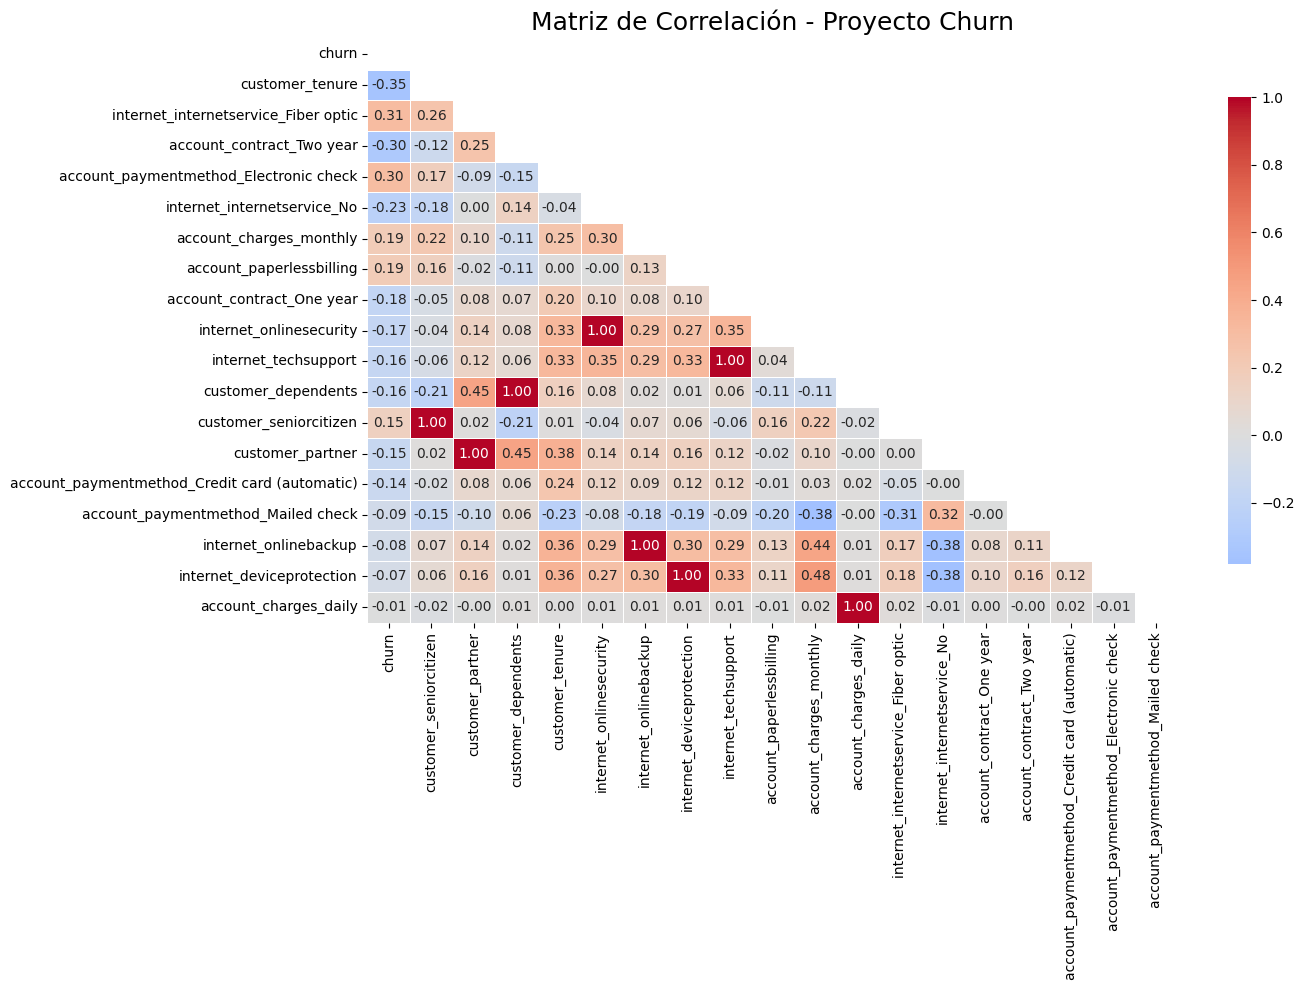

In [8]:


def plot_matriz_correlacion(df_ML):

    # ==========================
    # 1️⃣ Matriz de correlación
    # ==========================

    corr = df_ML.corr(method='pearson')

    # ==========================
    # 2️⃣ Ordenar por correlación con churn
    # ==========================

    corr = corr.loc[
        corr['churn'].abs().sort_values(ascending=False).index
    ]

    # ==========================
    # 3️⃣ Máscara triangular
    # ==========================

    mask = np.triu(np.ones_like(corr, dtype=bool))

    # ==========================
    # 4️⃣ Visualización
    # ==========================

    plt.figure(figsize=(14,10))

    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title("Matriz de Correlación - Proyecto Churn", fontsize=18)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()

    return plt

plot_matriz_correlacion(datos).show()

The correlation matrix confirms the preliminary analysis:

| Variable                               | Corr con Churn | Interpretación                           |
| -------------------------------------- | -------------- | ---------------------------------------- |
| customer_tenure                        | **-0.35**      | Mayor antigüedad → menor churn           |
| internet_internetservice_Fiber optic   | **0.30**       | Clientes con fibra cancelan más          |
| account_paymentmethod_Electronic check | **0.30**       | Método de pago más riesgoso              |
| account_contract_Two year              | **-0.30**      | Contrato largo reduce churn              |
| internet_internetservice_No            | **-0.23**      | Clientes sin internet cancelan menos     |
| account_paperlessbilling               | 0.19           | Facturación digital = más churn          |
| account_charges_monthly                | 0.19           | Más cargo mensual = más churn            |
| internet_onlinesecurity                | -0.17          | Seguridad reduce churn                   |
| internet_techsupport                   | -0.16          | Soporte reduce churn                     |
| customer_dependents                    | -0.16          | Clientes con dependientes cancelan menos |